In [291]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import plotly.express as px
import plotly.graph_objects as go
import warnings
import pandas as pd
from time import strptime
import locale
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from scipy.stats import norm
import re
import statsmodels.formula.api as smf
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Chargements des fichiers</h3>
</div>

In [293]:
#Importation du fichier customers.csv
df_customers = pd.read_csv("Data/customers.csv",sep=';')

#Importation du fichier.csv
df_products = pd.read_csv("Data/products.csv",sep=';')

#importation du fichier Transactions.csv
df_Transactions = pd.read_csv("Data/Transactions.csv",sep=';')

C:\Users\claud\AppData\Local\Temp\ipykernel_18888\2912122570.py:8: DtypeWarning:

Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Analyse exploratoire du fichier "customers.csv"</h3>
</div>

In [296]:
#Afficher les 5 premières lignes de la table
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [297]:
# Apprehender les datatypes des colonnes
df_customers.dtypes    

client_id    object
sex          object
birth         int64
dtype: object

In [298]:
# Rechercher des valeurs manquantes
df_customers.isnull().sum() 

client_id    0
sex          0
birth        0
dtype: int64

In [299]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_customers.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_customers.shape[1]))

Le tableau comporte 8621 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [300]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [301]:
# Vérifier s'il y a des doublons dans le DF

df_customers.duplicated().sum()   

0

In [302]:
#Vérifier si il y a les lignes en doublons dans la colonne client_id

df_customers.duplicated(subset=["client_id"]).value_counts()

False    8621
Name: count, dtype: int64

In [303]:
#Afficher les valeurs distinctes de la colonne sex

df_customers["sex"].unique()  

array(['f', 'm'], dtype=object)


<p style="color:blue;font-family:ComicSansMS; font-size: 25px;"> Creation de la colonne "age" </p>

In [305]:
df_customers["age"] = 2024 - df_customers["birth"]

In [306]:
df_customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,57
1,c_7839,f,1975,49
2,c_1699,f,1984,40
3,c_5961,f,1962,62
4,c_5320,m,1943,81


<p style="color:blue;font-family:ComicSansMS; font-size: 25px;"> Recherche des outliers dans la colonne age </p>

In [308]:
fig = px.box(df_customers, y= "age")
fig.show()

<p style="color:blue;font-family:ComicSansMS; font-size: 25px;"> Creation d'une discrétisation : la classe "age_label" </p>

In [310]:
df_customers['age_label'] = pd.cut(df_customers['age'], 
                            bins=[18, 29, 39, 49, 59, 100], 
                            labels=['18-29 ans', '30-39ans', '40-49ans', '50-59ans', '60+'])

In [311]:
df_customers.head()

,client_id,sex,birth,age,age_label
0,c_4410,f,1967,57,50-59ans
1,c_7839,f,1975,49,40-49ans
2,c_1699,f,1984,40,40-49ans
3,c_5961,f,1962,62,60+
4,c_5320,m,1943,81,60+


In [312]:
df_customers['age_label'].value_counts()

age_label
60+          1908
18-29 ans    1799
40-49ans     1772
30-39ans     1623
50-59ans     1519
Name: count, dtype: int64

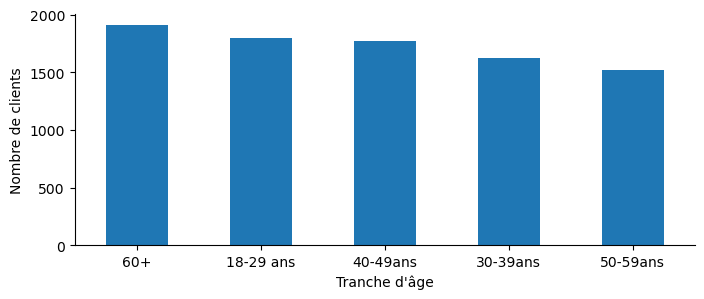

In [313]:
# Visualiser la distribution des clients par tranche d'âge 
# le graphique à barres est souvent utilisé pour comparer des quantités entre différentes catégories ou groupe

plt.figure(figsize=(8, 3))
ax = df_customers['age_label'].value_counts().plot(kind='bar')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre de clients')
plt.grid(False)
plt.xticks(rotation=0)
ax.spines[['top', 'right']].set_visible(False)
plt.show()

Text(0.5, 1.0, 'Répartition de la tranche age clients')

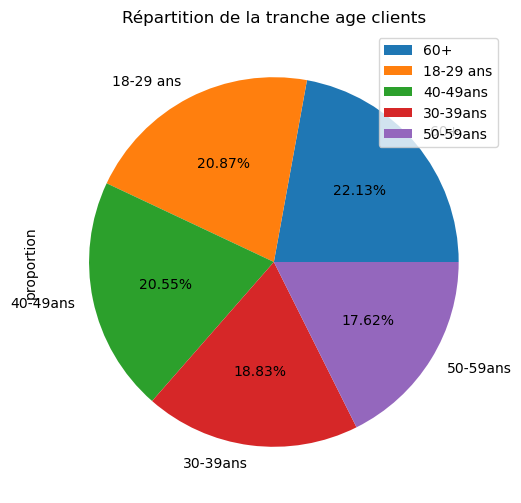

In [314]:
# Visualiser la distribution des clients par tranche d'âge (pourcentage)

plt.figure(figsize=(12,6))
df_customers['age_label'].value_counts(normalize=True).plot(kind='pie', legend=True, autopct='%.2f%%')
plt.title('Répartition de la tranche age clients')

In [315]:
df_customers["sex"].value_counts()

sex
f    4490
m    4131
Name: count, dtype: int64

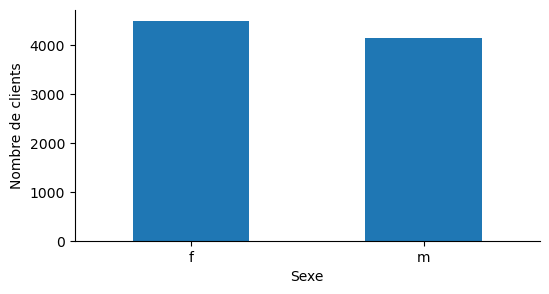

In [316]:
# Visualiser la distribution des clients par sexe

plt.figure(figsize=(6,3))
ax = df_customers['sex'].value_counts().plot(kind='bar')
plt.xlabel('Sexe')
plt.ylabel('Nombre de clients')
plt.grid(False)
plt.xticks(rotation=0)
ax.spines[['top', 'right']].set_visible(False)
plt.show()

<p style="color:blue;font-family:ComicSansMS; font-size: 25px;"> Vérifier la régle de codification dans la colonne "client_id"</p>

In [318]:
filtered_client_id = df_customers[df_customers['client_id'].str.contains('c_')]
filtered_client_id.head()

,client_id,sex,birth,age,age_label
0,c_4410,f,1967,57,50-59ans
1,c_7839,f,1975,49,40-49ans
2,c_1699,f,1984,40,40-49ans
3,c_5961,f,1962,62,60+
4,c_5320,m,1943,81,60+


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Analyse exploratoire de chaque variable du fichier "products.csv"</h3>
</div>

In [320]:
#Afficher les 5 premières lignes de la table

df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [321]:
# Apprehender les datatypes des colonnes

df_products.dtypes  

id_prod     object
price      float64
categ        int64
dtype: object

In [322]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_products.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_products.shape[1]))

Le tableau comporte 3286 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [323]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [324]:
# Rechercher des valeurs manquantes

df_products.isnull().sum() 

id_prod    0
price      0
categ      0
dtype: int64

In [325]:
#Vérifier si il y a des lignes en doublons dans la colonne id_prod

df_products.duplicated(subset=["id_prod"]).value_counts()

False    3286
Name: count, dtype: int64

In [326]:
#Afficher les valeurs distinctes de la colonne categ

df_products["categ"].unique() 

array([0, 1, 2], dtype=int64)

In [327]:
# Recherchant des valeurs négatives

df_products.sort_values(by='price').head()

,id_prod,price,categ
2271,0_528,0.62,0
2354,0_202,0.62,0
370,0_120,0.66,0
1210,0_1844,0.77,0
1529,0_1620,0.80,0


In [328]:
df_products['categ'].value_counts()

categ
0    2308
1     739
2     239
Name: count, dtype: int64

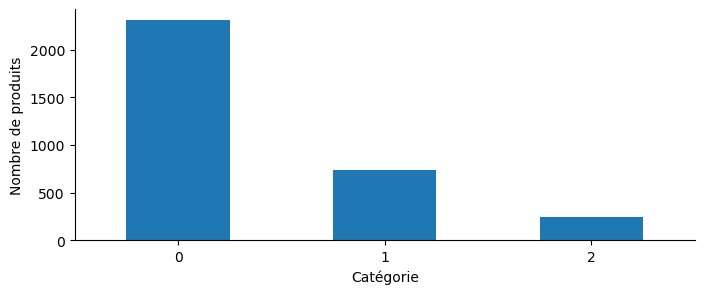

In [329]:
# Visualiser le nombre de produits par catégorie

plt.figure(figsize=(8, 3))
ax = df_products['categ'].value_counts().plot(kind='bar')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de produits')
plt.grid(False)
plt.xticks(rotation=0)
ax.spines[['top', 'right']].set_visible(False)
plt.show()

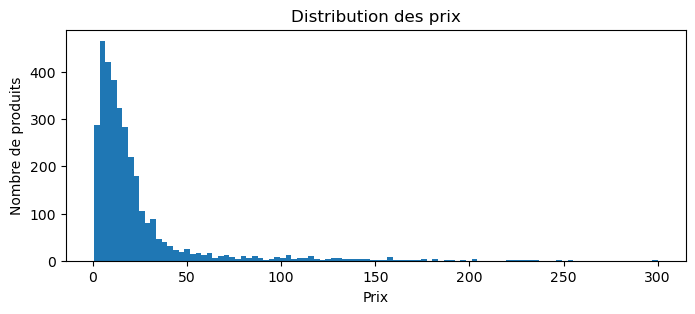

In [330]:
# Visualisation de la distribution des prix de ventes :combien de fois chaque prix apparaît dans les données

plt.figure(figsize=(8, 3))
ax = df_products['price'].hist(bins=100)
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Nombre de produits')
plt.grid(False)
plt.show()

In [331]:
# Visualisation de la distribution des prix de ventes par catégorie

In [332]:
# Choper tous les prix de la catégorie 0
categ_0_prices = df_products.loc[df_products["categ"] == 0, "price"]
categ_0_prices

0       19.99
1        5.13
2       17.99
4        3.99
5        9.99
        ...  
3279    20.63
3280    14.99
3282    17.14
3283    11.22
3285    25.16
Name: price, Length: 2308, dtype: float64

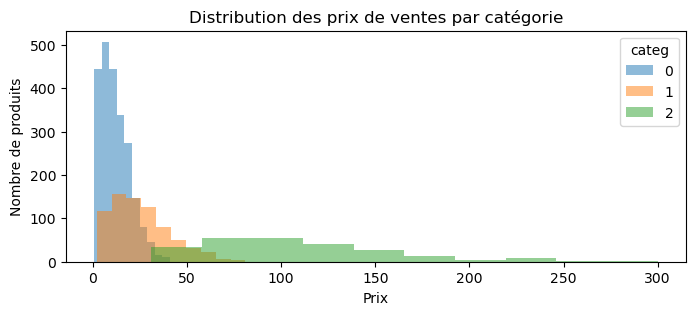

In [333]:
# define plot prices by group
plt.figure(figsize=(8, 3))
categ_0 = df_products.loc[df_products["categ"] == 0, "price"]
categ_1 = df_products.loc[df_products["categ"] == 1, "price"]
categ_2 = df_products.loc[df_products["categ"] == 2, "price"]


# add three histograms to one plot
plt.hist(categ_0, alpha= 0.5, label = 0)
plt.hist(categ_1, alpha= 0.5, label = 1)
plt.hist(categ_2, alpha= 0.5, label = 2)

# add plot titile ans axis labels
plt.title("Distribution des prix de ventes par catégorie")
plt.xlabel("Prix")
plt.ylabel("Nombre de produits")

# add legends
plt.legend(title = "categ")

# display plot
plt.show()

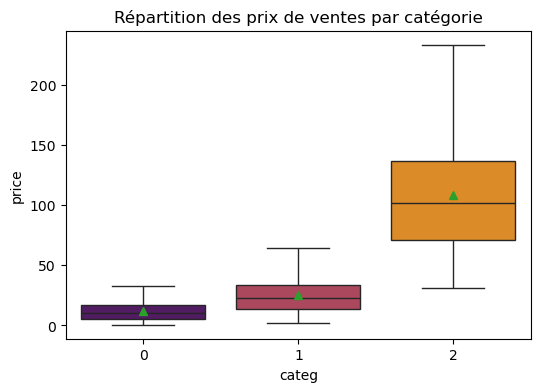

In [334]:
# Répartition des prix de ventes par catégorie

plt.figure(figsize=(6,4))
sns.boxplot(data=df_products, y='price', x='categ', orient='v', showfliers=False, showmeans=True, palette = "inferno")
plt.title('Répartition des prix de ventes par catégorie')
plt.show()

<p style="color:blue;font-family:ComicSansMS; font-size: 25px;"> Recherche des outliers dans "price" </p>

In [336]:
# Boxplot avec plotly express
fig = px.box(df_products, y= "price")
fig.show()

In [337]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_products["price"].describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [338]:
#Définissez un seuil pour les articles "outliers" en prix

Q3 = df_products[["price"]].describe().loc["75%"]["price"]
Q1 = df_products[["price"]].describe().loc["25%"]["price"]

Ecart_inter = Q3 - Q1
print(Ecart_inter)

# Toute valeur en dessous Q1 - 1.5 x IQR :  est un outlier
Valeur_faible = Q1 - (1.5 * Ecart_inter) 

# Toute valeur au dessus Q3 + 1.5 x IQR : est un outlier
Valeur_elevee =  Q3 + (1.5 * Ecart_inter)    


print(Valeur_faible)
print(Valeur_elevee)

15.999999999999998
-17.009999999999998
46.989999999999995


In [339]:
# Pour voir les outliers dans le DF

filt_outlier = (df_products["price"] >= 46.98) | (df_products["price"] <= -17)                                     

# Stockage des outliers dans un nouveau DataFrame
df_outliers = df_products.loc[filt_outlier]                                                             

df_outliers.head()

,id_prod,price,categ
10,2_228,225.17,2
11,1_178,51.92,1
38,2_100,72.11,2
49,1_48,47.22,1
64,2_89,107.99,2


In [340]:
df_products[df_products['id_prod'].isnull()]

,id_prod,price,categ


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Analyse exploratoire de chaque variable du fichier Transactions.csv</h3>
</div>

In [342]:
#Afficher les 5 premières lignes de la table

df_Transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [343]:
# Apprehender les datatypes des colonnes

df_Transactions.dtypes  

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

<p style="color:blue;font-family:ComicSansMS; font-size: 25px;"> Conversion de la colonne "date" en format DateTime ! </p>

In [345]:
df_Transactions["date"] = pd.to_datetime(df_Transactions["date"])

In [346]:
# Vérification de la conversion

df_Transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [347]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_Transactions.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_Transactions.shape[1]))

Le tableau comporte 1048575 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [348]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

df_Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 32.0+ MB


In [349]:
df_Transactions["date"].is_unique 

False

In [350]:
df_Transactions["session_id"].is_unique 

False

<p style="color:blue;font-family:ComicSansMS; font-size: 25px;"> Le DF a des valeurs manquantes. A supprimer! </p>

In [352]:
# Rechercher des valeurs manquantes

df_Transactions.isnull().sum() 

id_prod       361041
date          361041
session_id    361041
client_id     361041
dtype: int64

In [353]:
# Voir les valeurs nulles

nul_filt = df_Transactions["session_id"].isnull()

df_Transactions[nul_filt]

,id_prod,date,session_id,client_id
687534,NaN,NaT,NaN,NaN
687535,NaN,NaT,NaN,NaN
687536,NaN,NaT,NaN,NaN
687537,NaN,NaT,NaN,NaN
687538,NaN,NaT,NaN,NaN
...,...,...,...,...
1048570,NaN,NaT,NaN,NaN
1048571,NaN,NaT,NaN,NaN
1048572,NaN,NaT,NaN,NaN
1048573,NaN,NaT,NaN,NaN


In [354]:
# Avant de supprimer, regarder si la session_id est null ou non

verif_filt = (df_Transactions["id_prod"].isnull() & df_Transactions["session_id"].notnull())

df_Transactions[verif_filt]

,id_prod,date,session_id,client_id


In [355]:
# Suppression des valeurs manquantes !

df_Transactions.dropna(axis="index", how="any", subset= ["session_id"], inplace= True)  

In [356]:
# Vérification de la suppression des valeurs manquantes 

df_Transactions.isnull().sum() 

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [357]:
# Vérifier s'il y a des doublons dans le DF

df_Transactions.duplicated().sum()  

0

<p style="color:blue;font-family:ComicSansMS; font-size: 25px;"> Chaque ligne du df_transactions est unique ! </p>

In [359]:
# Recherche des doublons
# Sur ces 4 variables, il n'est normalement pas possible d'avoir deux transactions identiques :

filt = df_Transactions[['id_prod', 'date', 'session_id', 'client_id']].duplicated(keep=False)

In [360]:
df_Transactions.loc[filt]

,id_prod,date,session_id,client_id


<p style="color:blue;font-family:ComicSansMS; font-size: 25px;">Vérifier la régle de codification des colonnes "session_id"</p>

In [362]:
# Session_id 

filtered_sessionid = df_Transactions[df_Transactions['session_id'].str.contains("s_")]
filtered_sessionid


,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


<p style="color:blue;font-family:ComicSansMS; font-size: 25px;"> Vérifier la régle de codification dans la colonne "id_prod"</p>

In [364]:
# Avec Regex 

filtered_idprod = df_Transactions[df_Transactions['id_prod'].str.contains(r"^\w\w", na=False)]
filtered_idprod 

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


In [365]:
df_Transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,687534,687534,687534,687534
unique,3265,NaN,345505,8600
top,1_369,NaN,s_118668,c_1609
freq,2340,NaN,14,25586
mean,NaN,2022-03-01 21:24:00.618519296,NaN,NaN
min,NaN,2021-03-01 00:01:07.843138,NaN,NaN
25%,NaN,2021-09-10 10:35:20.642323456,NaN,NaN
50%,NaN,2022-02-27 06:50:25.400120064,NaN,NaN
75%,NaN,2022-08-28 22:16:49.841665536,NaN,NaN
max,NaN,2023-02-28 23:58:30.792755,NaN,NaN


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Jonction du fichier df_customers et df_Transactions</h3>
</div>

In [368]:
#Fusion des fichiers df_customers et df_Transactions

df_merge = pd.merge(df_customers, df_Transactions, on="client_id", how= "inner", indicator=True)

df_merge.head()

,client_id,sex,birth,age,age_label,id_prod,date,session_id,_merge
0,c_4410,f,1967,57,50-59ans,1_483,2021-03-13 21:35:55.949042,s_5913,both
1,c_4410,f,1967,57,50-59ans,0_1111,2021-03-22 01:27:49.480137,s_9707,both
2,c_4410,f,1967,57,50-59ans,1_385,2021-03-22 01:40:22.782925,s_9707,both
3,c_4410,f,1967,57,50-59ans,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,f,1967,57,50-59ans,0_1420,2021-03-22 22:31:25.825764,s_10092,both


In [369]:
df_merge.shape

(687534, 9)

In [370]:
# Vérfier les lignes "matchant" entre les 2 fichiers

df_merge._merge.value_counts()

_merge
both          687534
left_only          0
right_only         0
Name: count, dtype: int64

In [371]:
# Suppression de la colonne indicator _merge

df_merge.drop(columns= "_merge", inplace=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Jonction du fichier df_products et df_merge</h3>
</div>

In [373]:
#Fusion des fichiers df_customers et df_Transactions

df_merged = pd.merge(df_products, df_merge, on="id_prod", how= "inner", indicator=True)

df_merged.shape

(687534, 11)

In [374]:
# Vérifier les lignes "matchant" entre les 2 fichiers

df_merged._merge.value_counts()

_merge
both          687534
left_only          0
right_only         0
Name: count, dtype: int64

In [375]:
df_merged.head()

,id_prod,price,categ,client_id,sex,birth,age,age_label,date,session_id,_merge
0,0_1421,19.99,0,c_5152,f,1986,38,30-39ans,2021-04-17 06:09:37.424812,s_21727,both
1,0_1421,19.99,0,c_2167,f,1960,64,60+,2021-11-24 00:28:06.088699,s_124134,both
2,0_1421,19.99,0,c_2167,f,1960,64,60+,2022-08-24 00:28:06.088699,s_257560,both
3,0_1421,19.99,0,c_3060,m,1971,53,50-59ans,2021-04-06 09:35:05.954975,s_16742,both
4,0_1421,19.99,0,c_3060,m,1971,53,50-59ans,2022-03-06 09:35:05.954975,s_175117,both


In [376]:
df_merged.drop(columns= "_merge", inplace=True)

In [377]:
df_merged.head()

,id_prod,price,categ,client_id,sex,birth,age,age_label,date,session_id
0,0_1421,19.99,0,c_5152,f,1986,38,30-39ans,2021-04-17 06:09:37.424812,s_21727
1,0_1421,19.99,0,c_2167,f,1960,64,60+,2021-11-24 00:28:06.088699,s_124134
2,0_1421,19.99,0,c_2167,f,1960,64,60+,2022-08-24 00:28:06.088699,s_257560
3,0_1421,19.99,0,c_3060,m,1971,53,50-59ans,2021-04-06 09:35:05.954975,s_16742
4,0_1421,19.99,0,c_3060,m,1971,53,50-59ans,2022-03-06 09:35:05.954975,s_175117


In [378]:
# Supprimer les lignes NaN et NaT

df_merged.dropna(subset=["price","date"], inplace=True)

In [379]:
df_merged.tail()

,id_prod,price,categ,client_id,sex,birth,age,age_label,date,session_id
687529,1_140,38.56,1,c_7406,m,1988,36,30-39ans,2022-12-09 14:20:34.169187,s_309513
687530,0_1920,25.16,0,c_7748,f,1989,35,30-39ans,2021-05-30 02:37:22.371278,s_41465
687531,0_1920,25.16,0,c_7748,f,1989,35,30-39ans,2022-12-30 02:37:22.371278,s_319303
687532,0_1920,25.16,0,c_7748,f,1989,35,30-39ans,2023-01-30 02:37:22.371278,s_334324
687533,0_1920,25.16,0,c_7088,m,1987,37,30-39ans,2021-04-13 18:36:10.252971,s_20115


In [380]:
# Re-conversion des colonnes converties en float en int pendant la jonction

df_merged["categ"] = df_merged["categ"].astype('Int64')
df_merged["birth"] = df_merged["birth"].astype('Int64')
df_merged["age"] = df_merged["age"].astype('Int64')

In [381]:
df_merged.head()

,id_prod,price,categ,client_id,sex,birth,age,age_label,date,session_id
0,0_1421,19.99,0,c_5152,f,1986,38,30-39ans,2021-04-17 06:09:37.424812,s_21727
1,0_1421,19.99,0,c_2167,f,1960,64,60+,2021-11-24 00:28:06.088699,s_124134
2,0_1421,19.99,0,c_2167,f,1960,64,60+,2022-08-24 00:28:06.088699,s_257560
3,0_1421,19.99,0,c_3060,m,1971,53,50-59ans,2021-04-06 09:35:05.954975,s_16742
4,0_1421,19.99,0,c_3060,m,1971,53,50-59ans,2022-03-06 09:35:05.954975,s_175117


In [382]:
df_merged.dtypes

id_prod               object
price                float64
categ                  Int64
client_id             object
sex                   object
birth                  Int64
age                    Int64
age_label           category
date          datetime64[ns]
session_id            object
dtype: object

In [383]:
df_merged.isnull().sum() 

id_prod       0
price         0
categ         0
client_id     0
sex           0
birth         0
age           0
age_label     0
date          0
session_id    0
dtype: int64

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">LA PARTIE ANALYSE</h2>
</div>

In [385]:
# Extraction du mois, année, jour du DateTime
df_merged["mois"] = df_merged["date"].dt.month
df_merged["année"] = df_merged["date"].dt.year
df_merged["jour"] = df_merged["date"].dt.day
df_merged['date_du_jour'] = df_merged['date'].dt.date 
df_merged['année_mois'] = df_merged['année'].astype(str) + "-" + df_merged['mois'].astype(str)
locale.setlocale(locale.LC_ALL, 'fr_FR')
df_merged['nom_du_mois'] = df_merged['date'].dt.strftime('%b')

#Conversion de année mois en DateTime
df_merged["année_mois"] = pd.to_datetime(df_merged["année_mois"])

In [386]:
df_merged.sample(3)

,id_prod,price,categ,client_id,sex,birth,age,age_label,date,session_id,mois,année,jour,date_du_jour,année_mois,nom_du_mois
220784,2_79,55.99,2,c_2589,f,2004,20,18-29 ans,2021-05-09 02:10:19.603086,s_31921,5,2021,9,2021-05-09,2021-05-01,mai
519165,0_1476,15.66,0,c_4454,f,1973,51,50-59ans,2021-07-19 19:35:19.860012,s_64536,7,2021,19,2021-07-19,2021-07-01,juil.
396657,1_445,23.99,1,c_7885,m,1962,62,60+,2022-12-24 01:02:54.043355,s_316468,12,2022,24,2022-12-24,2022-12-01,déc.


# (1) Chiffre d'Affaires avec la moyenne mobile par mois

In [388]:
# CA total
df_merged["price"].sum()

12027663.099999998

In [389]:
# CA annuel
CA_annuel = df_merged.groupby("année")["price"].sum().reset_index()
CA_annuel

,année,price
0,2021,4944760.98
1,2022,6108681.81
2,2023,974220.31


Text(0.5, 1.0, "Evolution du Chiffre d'Affaire par Année")

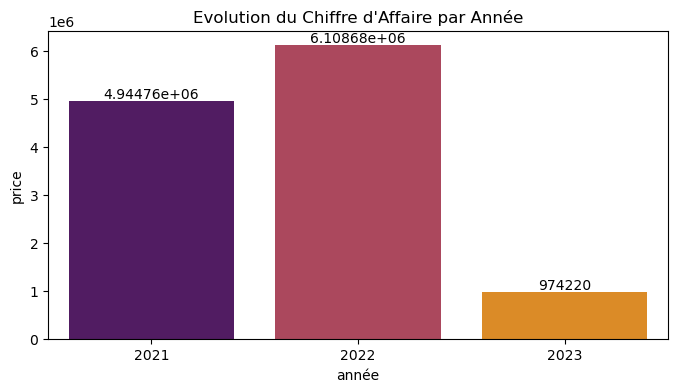

In [390]:
# Visualisation du CA annuel

plt.figure(figsize=(8,4))
ax = sns.barplot(x= "année", y= "price", data= CA_annuel, palette= "inferno")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Evolution du Chiffre d'Affaire par Année")

In [391]:
# Pour calculer le CA par mois

df_CA_par_mois = df_merged.groupby("année_mois")["price"].sum().reset_index()
df_CA_par_mois

,année_mois,price
0,2021-03-01,482440.61
1,2021-04-01,476109.30
2,2021-05-01,492943.47
3,2021-06-01,484088.56
4,2021-07-01,482835.40
5,2021-08-01,482284.79
6,2021-09-01,507240.68
7,2021-10-01,494733.16
8,2021-11-01,516167.73
9,2021-12-01,525917.28


In [392]:
# Créant une colonne calculant la moyenne mobile du CA par mois
df_CA_par_mois["moving_average"] = df_CA_par_mois["price"].rolling(3).mean()
df_CA_par_mois

,année_mois,price,moving_average
0,2021-03-01,482440.61,NaN
1,2021-04-01,476109.30,NaN
2,2021-05-01,492943.47,483831.126667
3,2021-06-01,484088.56,484380.443333
4,2021-07-01,482835.40,486622.476667
5,2021-08-01,482284.79,483069.583333
6,2021-09-01,507240.68,490786.956667
7,2021-10-01,494733.16,494752.876667
8,2021-11-01,516167.73,506047.190000
9,2021-12-01,525917.28,512272.723333


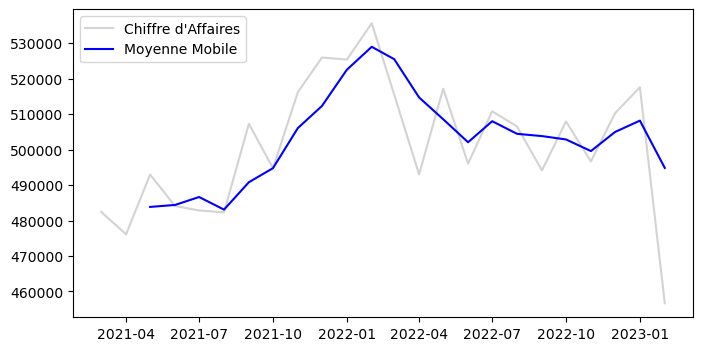

In [393]:
# Affichant le CA par mois avec la moyenne mobile sur le même graphique
plt.figure(figsize=(8,4))
plt.plot(df_CA_par_mois["année_mois"], df_CA_par_mois["price"], c= "lightgray", label= "Chiffre d'Affaires")
plt.plot(df_CA_par_mois["année_mois"], df_CA_par_mois["moving_average"], c= "blue", label= "Moyenne Mobile")
plt.legend(loc='upper left')
plt.show()

In [394]:
#Nous remarquons une baisse du CA en Février ; pourquoi ?
#Baisse du CA en Février

Février = df_merged.loc[df_merged.année_mois == '2022-02', ['jour', 'price','categ']]
Février

,jour,price,categ
77,24,19.99,0
83,3,19.99,0
105,19,19.99,0
121,26,19.99,0
144,18,19.99,0
...,...,...,...
687377,12,55.99,1
687378,18,55.99,1
687421,17,14.99,0
687482,23,17.14,0


In [395]:
# CA de Février par catégorie

CA_Février = pd.pivot_table(Février, index = ['jour'], columns = 'categ', values = 'price',aggfunc=np.sum)
CA_Février

categ,0,1,2
jour,,,
1,5646.66,8249.51,3256.15
2,6189.86,8206.18,4786.20
3,5707.12,8142.98,4294.45
4,5997.97,8259.23,5167.94
5,5782.00,8130.39,4932.23
6,6430.64,7833.93,5002.79
7,6706.77,7980.85,4223.05
8,6088.23,8253.21,4744.72
9,6395.28,7727.71,4459.99


Text(0.5, 1.0, 'Evolution du C.A en octobre')

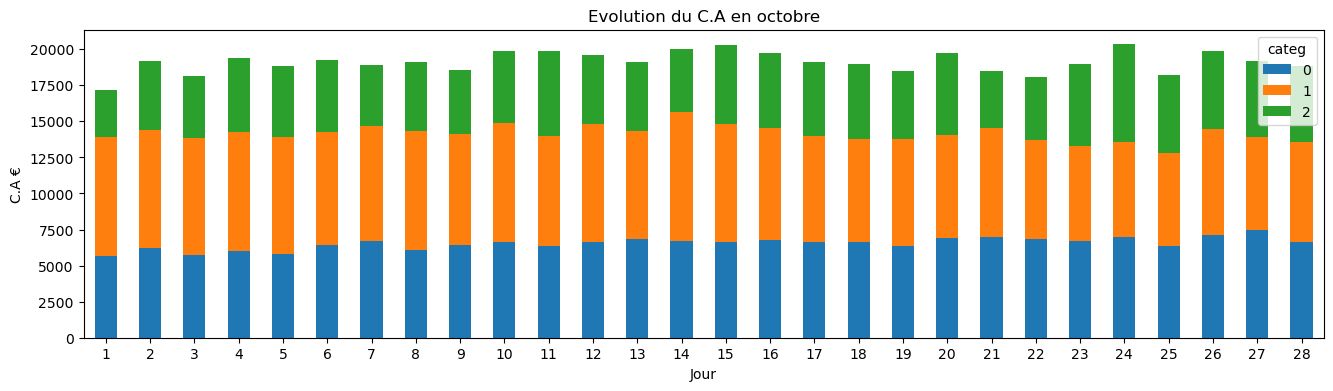

In [396]:
# Visualisation du CA d'octobre

CA_Février.plot.bar(figsize=(16,4), stacked=True)
plt.xlabel('Jour')
plt.xticks(rotation=0)
plt.ylabel('C.A €')
plt.title('Evolution du C.A en octobre')

In [397]:
df_merged["age"].value_counts()

age
44    47702
36    25245
45    25101
46    24905
38    23693
      ...  
92      312
89      278
94      238
95      202
93      170
Name: count, Length: 76, dtype: Int64

In [398]:
#Âge des clients

age_client_count= df_merged["age"].value_counts().rename_axis('age_client').reset_index(name='count').sort_values(by='age_client')
age_client_count

,age_client,count
20,20,15497
48,21,4491
45,22,4711
49,23,4378
47,24,4529
...,...,...
70,91,336
71,92,312
75,93,170
73,94,238


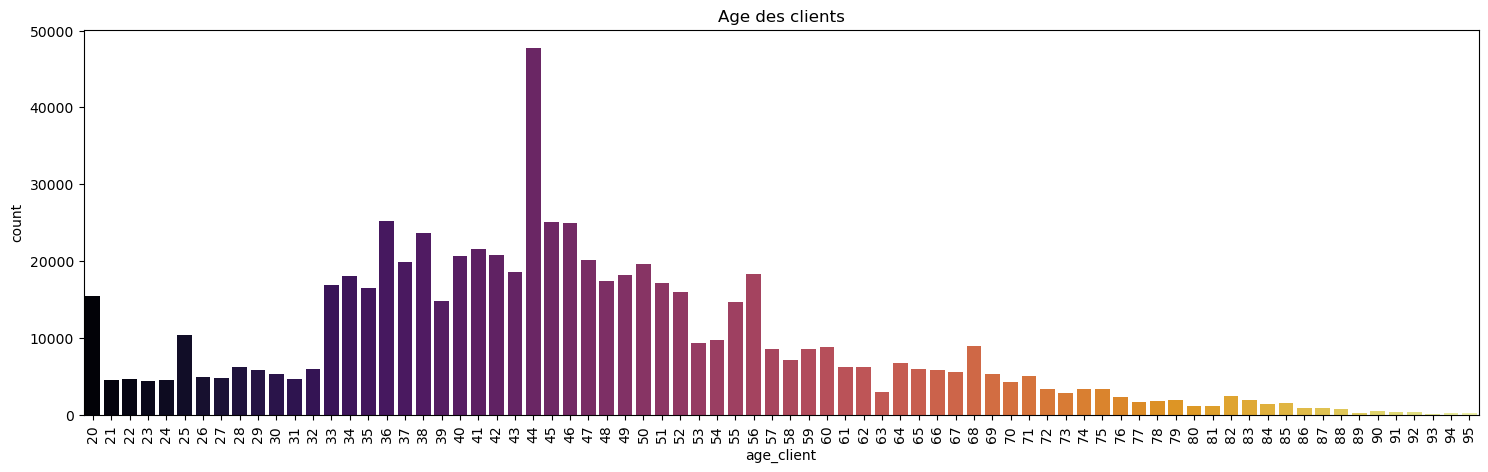

In [399]:
#Répartition des clients par âge

plt.figure(figsize=(18,5))
sns.barplot(data=age_client_count,y='count', x='age_client', palette ="inferno")
plt.xticks(rotation=90)
plt.title('Age des clients')
plt.show()

### La majorité de la clientèle Lapage a entre 30 et 50 ans. On remarque également un nombre beaucoup plus important de clients ayant 17 à 18 ans.

In [401]:
copy_df_merged = df_merged.copy()

In [402]:
CA_par_jour = copy_df_merged.groupby("date_du_jour")["price"].sum().reset_index()
CA_par_jour

,date_du_jour,price
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


# Décomposition de la Time Series (par semaine)

In [404]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil import parser

In [405]:
# Décomposition multiplicative 
mult_result = seasonal_decompose(CA_par_jour["price"], model = "multiplicative", period= 7)

Text(0.5, 0.98, '\nDécomposition Multiplicative')

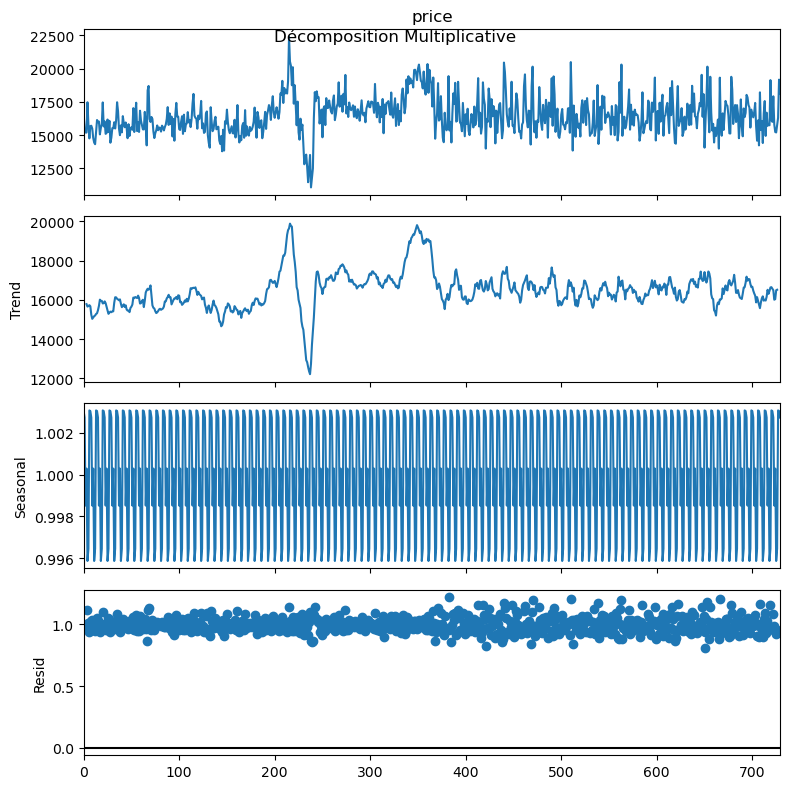

In [406]:
# Plot 

plt.rcParams.update({"figure.figsize": (8,8)})
mult_result.plot().suptitle("\nDécomposition Multiplicative")

In [407]:
# Multiplicative 
new_df_mult = pd.concat([mult_result.seasonal, mult_result.trend, mult_result.resid, mult_result.observed], axis =1)
new_df_mult.columns = ["seasonalité", "tendance", "résidual", "valeurs_réelles"]
new_df_mult.head(5)

,seasonalité,tendance,résidual,valeurs_réelles
0,1.003046,NaN,NaN,16565.22
1,1.002736,NaN,NaN,15486.45
2,0.998521,NaN,NaN,15198.69
3,1.000293,15780.468571,0.962685,15196.07
4,0.995869,15653.941429,1.120730,17471.37


# (2) Chiffre d'Affaires par catégorie

In [409]:
CA_par_categ = df_merged.groupby('categ')['price'].sum().reset_index().rename(columns={'price': 'CA_par_categ'})

In [410]:
CA_par_categ

,categ,CA_par_categ
0,0,4419730.97
1,1,4827657.11
2,2,2780275.02


<Axes: ylabel='CA_par_categ'>

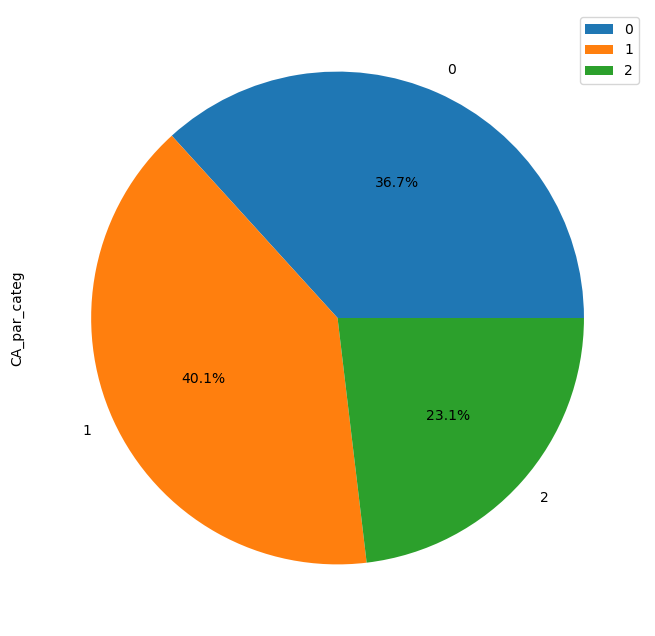

In [411]:
CA_par_categ.plot(kind='pie', y='CA_par_categ',legend=True,autopct='%1.1f%%')

In [412]:
df_merged = df_merged.merge(df_merged.groupby('categ')['price'].sum().reset_index().rename(columns={'price': 'CA_par_categ'}),how='left', on='categ')
df_merged.sample(3)

,id_prod,price,categ,client_id,sex,birth,age,age_label,date,session_id,mois,année,jour,date_du_jour,année_mois,nom_du_mois,CA_par_categ
546852,0_157,19.99,0,c_248,f,1988,36,30-39ans,2023-01-30 05:25:42.122915,s_334363,1,2023,30,2023-01-30,2023-01-01,janv.,4419730.97
403717,0_1313,13.99,0,c_252,f,1973,51,50-59ans,2022-01-10 01:15:39.032133,s_147539,1,2022,10,2022-01-10,2022-01-01,janv.,4419730.97
609818,0_1919,6.99,0,c_4763,m,1987,37,30-39ans,2021-10-04 05:57:04.169463,s_99724,10,2021,4,2021-10-04,2021-10-01,oct.,4419730.97


Text(0.5, 1.0, "Chiffre d'Affaire par catégorie")

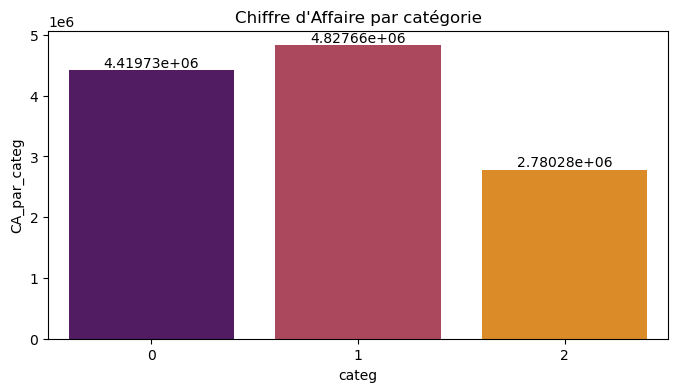

In [413]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x= "categ", y= "CA_par_categ", data=CA_par_categ, palette= "inferno")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Chiffre d'Affaire par catégorie")

# (3) Nombre de clients par mois

In [415]:
df_nombre_clients_du_mois = df_merged.pivot_table(index= "année_mois", values='client_id', aggfunc='nunique', fill_value=0).reset_index()
df_nombre_clients_du_mois

,année_mois,client_id
0,2021-03-01,5676
1,2021-04-01,5674
2,2021-05-01,5644
3,2021-06-01,5659
4,2021-07-01,5672
5,2021-08-01,5642
6,2021-09-01,5693
7,2021-10-01,6190
8,2021-11-01,5875
9,2021-12-01,5867


Text(0, 0.5, 'Nombre de Clients')

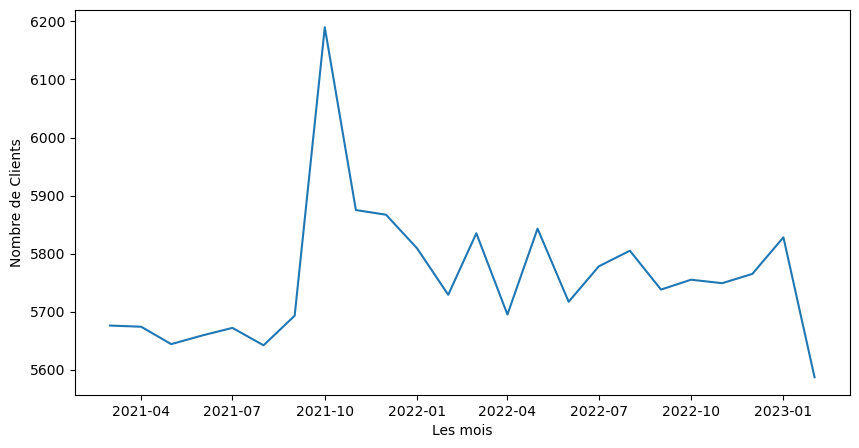

In [416]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x= "année_mois", y= "client_id", data= df_nombre_clients_du_mois)
plt.xlabel("Les mois")
plt.ylabel("Nombre de Clients")

# (4) Nombre de transactions par jour

In [418]:
df_nombre_transactions = df_merged.groupby('date_du_jour')['session_id'].count().reset_index().rename(columns={'session_id': 'Nombre_de_transactions'})
df_nombre_transactions

,date_du_jour,Nombre_de_transactions
0,2021-03-01,962
1,2021-03-02,939
2,2021-03-03,911
3,2021-03-04,903
4,2021-03-05,943
...,...,...
725,2023-02-24,894
726,2023-02-25,905
727,2023-02-26,890
728,2023-02-27,1110


Text(0, 0.5, 'Nombre de Transactions')

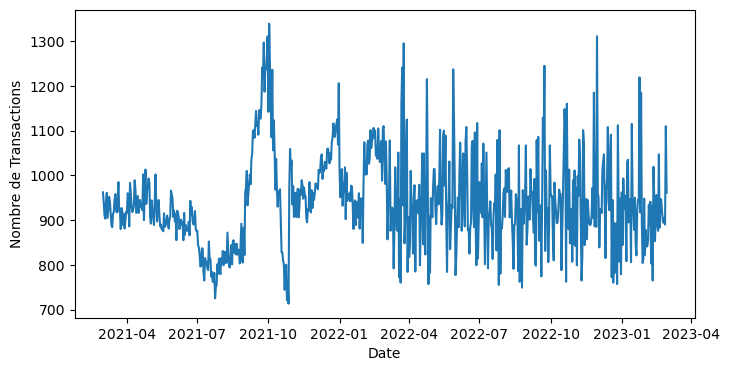

In [419]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(x= "date_du_jour", y= "Nombre_de_transactions", data= df_nombre_transactions)
plt.xlabel("Date")
plt.ylabel("Nombre de Transactions")

## Nombre de transactions par mois

In [421]:
nombre_transactions_mois = df_merged.groupby('année_mois')['session_id'].count().reset_index().rename(columns={'session_id': 'Nombre_de_transactions'})
nombre_transactions_mois

,année_mois,Nombre_de_transactions
0,2021-03-01,28601
1,2021-04-01,28443
2,2021-05-01,28285
3,2021-06-01,26850
4,2021-07-01,24738
5,2021-08-01,25650
6,2021-09-01,33314
7,2021-10-01,30022
8,2021-11-01,28311
9,2021-12-01,32457


Text(0, 0.5, 'Nombre de Transactions')

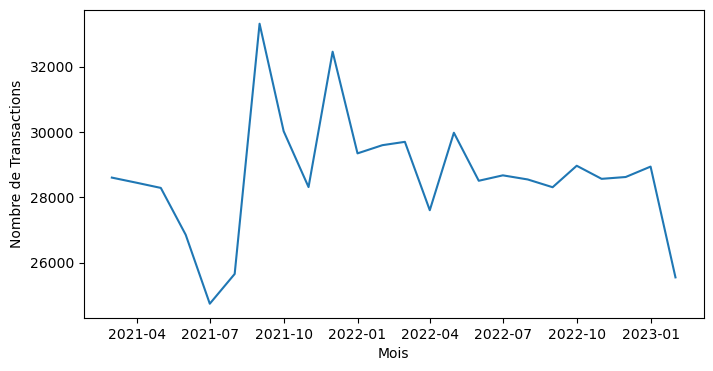

In [422]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(x= "année_mois", y= "Nombre_de_transactions", data= nombre_transactions_mois)
plt.xlabel("Mois")
plt.ylabel("Nombre de Transactions")

# (5) Nombre de produits (uniques) vendus par jour 

In [424]:
# Nombre de produits uniques vendus

df_merged["id_prod"].nunique()

3265

In [425]:
# Nombre de produits (uniques) vendus par jour 

df_nombre_produits_vendus = df_merged.groupby('date_du_jour')['id_prod'].nunique().reset_index().rename(columns={'id_prod': 'Nombre_de_produits_vendus'})

df_nombre_produits_vendus 

,date_du_jour,Nombre_de_produits_vendus
0,2021-03-01,646
1,2021-03-02,637
2,2021-03-03,643
3,2021-03-04,616
4,2021-03-05,620
...,...,...
725,2023-02-24,610
726,2023-02-25,575
727,2023-02-26,590
728,2023-02-27,711


Text(0.5, 0, 'Date')

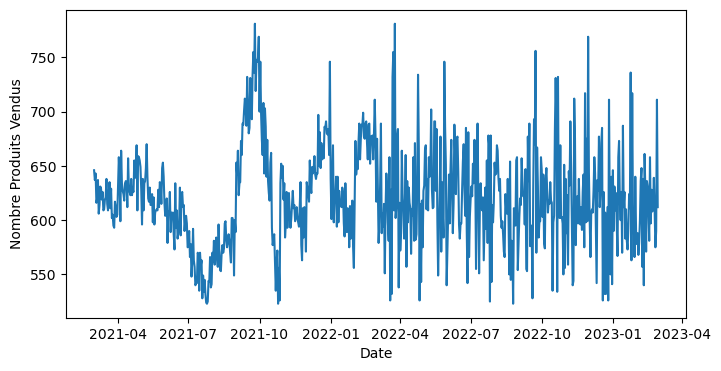

In [426]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(x= "date_du_jour", y= "Nombre_de_produits_vendus", data= df_nombre_produits_vendus)
plt.ylabel("Nombre Produits Vendus")
plt.xlabel("Date")

## Nombre de produits (uniques) vendus par mois

In [428]:
nombre_produits_vendus_mois = df_merged.groupby('année_mois')['id_prod'].nunique().reset_index().rename(columns={'id_prod': 'Nombre_de_produits_vendus'})

nombre_produits_vendus_mois

,année_mois,Nombre_de_produits_vendus
0,2021-03-01,2482
1,2021-04-01,2492
2,2021-05-01,2471
3,2021-06-01,2414
4,2021-07-01,2369
5,2021-08-01,2404
6,2021-09-01,2560
7,2021-10-01,2506
8,2021-11-01,2432
9,2021-12-01,2505


Text(0.5, 0, 'Mois')

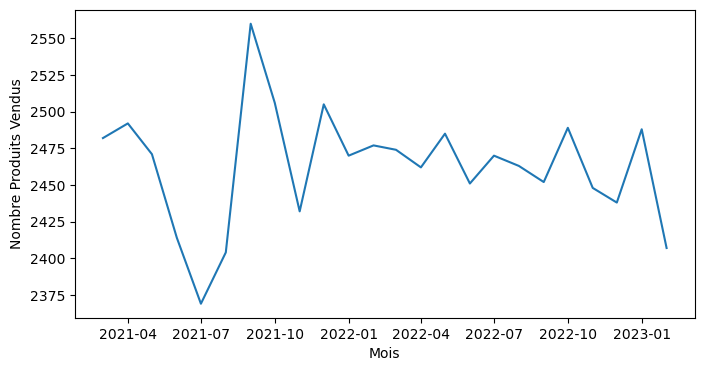

In [429]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(x= "année_mois", y= "Nombre_de_produits_vendus", data= nombre_produits_vendus_mois)
plt.ylabel("Nombre Produits Vendus")
plt.xlabel("Mois")

# (6) Le TOP 10 Produits

In [431]:
produit_grp = df_merged.groupby(["id_prod"])
df_prod = produit_grp["price"].sum().reset_index()
top10_prod_df = df_prod.sort_values(by = "price", ascending=False).head(10)
top10_prod_df

,id_prod,price
3096,2_159,94893.50
3070,2_135,69334.95
3045,2_112,65407.76
3034,2_102,60736.78
3152,2_209,56971.86
2619,1_395,56617.47
2591,1_369,56136.60
3043,2_110,53846.25
2607,1_383,53834.43
2641,1_414,53522.18


Text(0.5, 1.0, 'Le Top 10 Produits Les Plus Vendus')

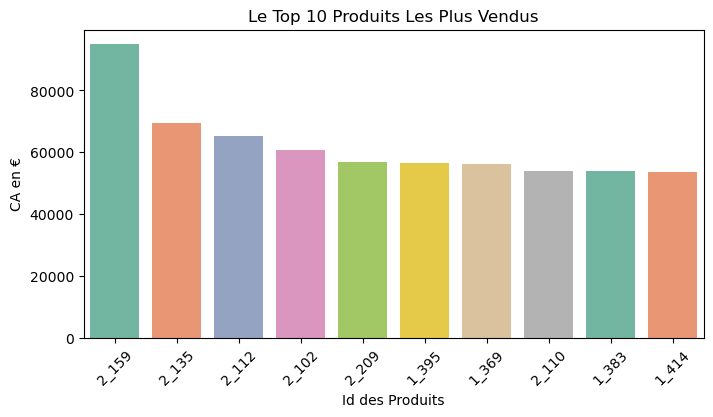

In [432]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x= "id_prod", y= "price", data=top10_prod_df, palette='Set2')
plt.xlabel('Id des Produits')
plt.xticks(rotation=45)
plt.ylabel('CA en €')
plt.title("Le Top 10 Produits Les Plus Vendus")


# (6) LE FLOP 10 PRODUITS

In [434]:
flop10_df = df_prod.sort_values(by = "price").head(10)
flop10_df

,id_prod,price
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
1784,0_541,1.99
665,0_1601,1.99
2079,0_807,1.99
802,0_1728,2.27
549,0_1498,2.48
2179,0_898,2.54
925,0_1840,2.56


Text(0.5, 1.0, 'Le Flop 10 Produits Les Moins Vendus')

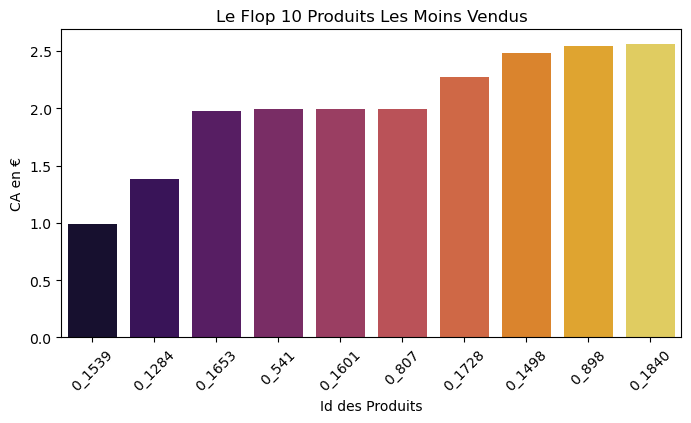

In [435]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x= "id_prod", y= "price", data=flop10_df, palette='inferno')
plt.xlabel('Id des Produits')
plt.xticks(rotation=45)
plt.ylabel('CA en €')
plt.title("Le Flop 10 Produits Les Moins Vendus")

# Répartition volume des ventes par catégorie

Text(0.5, 1.0, 'Répartition  du volume des ventes par catégorie')

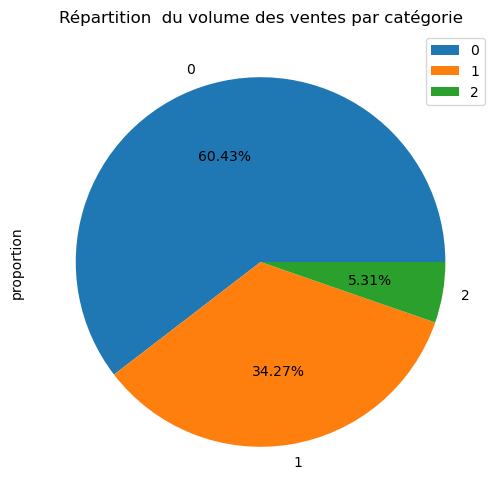

In [437]:
plt.figure(figsize=(6,6))
df_merged['categ'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%.2f%%')
plt.title('Répartition  du volume des ventes par catégorie')

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie analyse ciblée pour les clients</h2>
</div>

In [439]:
Top_clients = df_merged.groupby("client_id")["price"].sum().nlargest(10).reset_index()
Top_clients

,client_id,price
0,c_1609,326039.89
1,c_4958,290227.03
2,c_6714,153918.60
3,c_3454,114110.57
4,c_1570,5285.82
5,c_3263,5276.87
6,c_2140,5260.18
7,c_2899,5214.05
8,c_7319,5155.77
9,c_7959,5135.75


In [440]:
# On voit immediatement 4 clients qui se distinguent !

Text(0.5, 1.0, 'Le Top 10 clients')

<Figure size 600x300 with 0 Axes>

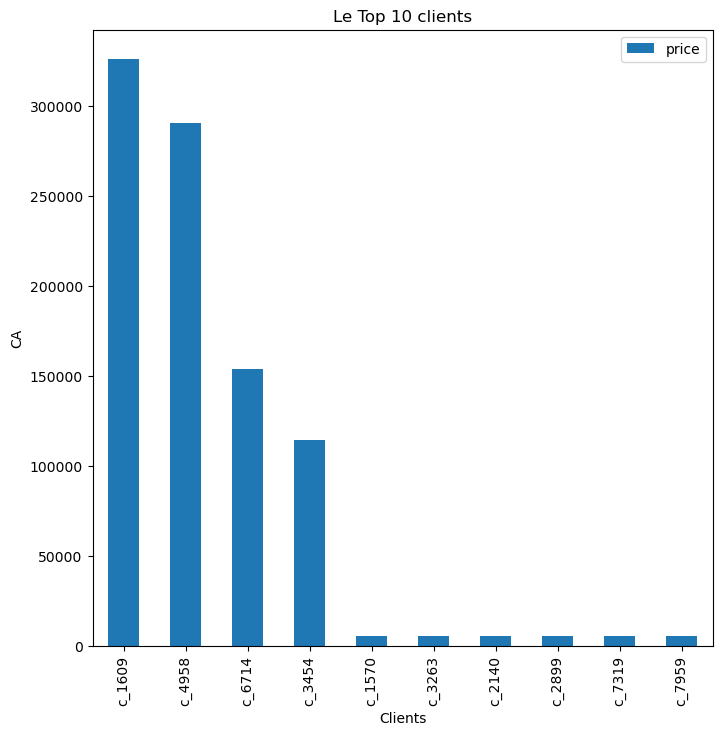

In [441]:
# Top 10 clients 

plt.figure(figsize=(6,3))
Top_clients.plot.bar(x='client_id', y='price')
plt.xlabel('Clients')
plt.ylabel('CA')
plt.title('Le Top 10 clients')

In [442]:
# Mettre les 4 gros clients dans un nouvel DataFrame B2B

df_B2B = df_merged[(df_merged["client_id"] == 'c_1609')|(df_merged["client_id" ] =='c_4958')|(df_merged["client_id"] =='c_6714')|(df_merged["client_id"] =='c_3454')]
df_B2B

,id_prod,price,categ,client_id,sex,birth,age,age_label,date,session_id,mois,année,jour,date_du_jour,année_mois,nom_du_mois,CA_par_categ
234,0_1421,19.99,0,c_6714,f,1968,56,50-59ans,2021-04-02 08:24:37.335017,s_14853,4,2021,2,2021-04-02,2021-04-01,avr.,4419730.97
235,0_1421,19.99,0,c_6714,f,1968,56,50-59ans,2021-07-10 02:30:41.901616,s_60242,7,2021,10,2021-07-10,2021-07-01,juil.,4419730.97
236,0_1421,19.99,0,c_6714,f,1968,56,50-59ans,2021-09-20 06:39:24.010766,s_92614,9,2021,20,2021-09-20,2021-09-01,sept.,4419730.97
237,0_1421,19.99,0,c_6714,f,1968,56,50-59ans,2021-11-30 21:06:16.147025,s_127480,11,2021,30,2021-11-30,2021-11-01,nov.,4419730.97
238,0_1421,19.99,0,c_6714,f,1968,56,50-59ans,2021-12-12 16:25:24.521515,s_133316,12,2021,12,2021-12-12,2021-12-01,déc.,4419730.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687389,0_1314,20.63,0,c_1609,m,1980,44,40-49ans,2022-07-17 01:53:36.437958,s_239449,7,2022,17,2022-07-17,2022-07-01,juil.,4419730.97
687390,0_1314,20.63,0,c_1609,m,1980,44,40-49ans,2022-12-13 17:28:52.519235,s_311501,12,2022,13,2022-12-13,2022-12-01,déc.,4419730.97
687409,0_607,14.99,0,c_1609,m,1980,44,40-49ans,2021-12-29 07:49:12.138000,s_141734,12,2021,29,2021-12-29,2021-12-01,déc.,4419730.97
687410,0_607,14.99,0,c_1609,m,1980,44,40-49ans,2022-03-29 07:49:12.138000,s_186205,3,2022,29,2022-03-29,2022-03-01,mars,4419730.97


In [443]:
# Un nouveau Dataframe sans les 4 gros B2B

df_Particuliers = df_merged.drop(df_B2B.index).reset_index(drop=True)
df_Particuliers

,id_prod,price,categ,client_id,sex,birth,age,age_label,date,session_id,mois,année,jour,date_du_jour,année_mois,nom_du_mois,CA_par_categ
0,0_1421,19.99,0,c_5152,f,1986,38,30-39ans,2021-04-17 06:09:37.424812,s_21727,4,2021,17,2021-04-17,2021-04-01,avr.,4419730.97
1,0_1421,19.99,0,c_2167,f,1960,64,60+,2021-11-24 00:28:06.088699,s_124134,11,2021,24,2021-11-24,2021-11-01,nov.,4419730.97
2,0_1421,19.99,0,c_2167,f,1960,64,60+,2022-08-24 00:28:06.088699,s_257560,8,2022,24,2022-08-24,2022-08-01,août,4419730.97
3,0_1421,19.99,0,c_3060,m,1971,53,50-59ans,2021-04-06 09:35:05.954975,s_16742,4,2021,6,2021-04-06,2021-04-01,avr.,4419730.97
4,0_1421,19.99,0,c_3060,m,1971,53,50-59ans,2022-03-06 09:35:05.954975,s_175117,3,2022,6,2022-03-06,2022-03-01,mars,4419730.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640729,1_140,38.56,1,c_7406,m,1988,36,30-39ans,2022-12-09 14:20:34.169187,s_309513,12,2022,9,2022-12-09,2022-12-01,déc.,4827657.11
640730,0_1920,25.16,0,c_7748,f,1989,35,30-39ans,2021-05-30 02:37:22.371278,s_41465,5,2021,30,2021-05-30,2021-05-01,mai,4419730.97
640731,0_1920,25.16,0,c_7748,f,1989,35,30-39ans,2022-12-30 02:37:22.371278,s_319303,12,2022,30,2022-12-30,2022-12-01,déc.,4419730.97
640732,0_1920,25.16,0,c_7748,f,1989,35,30-39ans,2023-01-30 02:37:22.371278,s_334324,1,2023,30,2023-01-30,2023-01-01,janv.,4419730.97


In [444]:
print("Clients B2B :",round(df_B2B['price'].sum() / df_merged['price'].sum() * 100, 2), '% du chiffre d\'affaires')

Clients B2B : 7.35 % du chiffre d'affaires


In [445]:
print("Clients Particuliers :",round(df_Particuliers['price'].sum() / df_merged['price'].sum() * 100, 2), '% du chiffre d\'affaires')

Clients Particuliers : 92.65 % du chiffre d'affaires


In [446]:
df_CA_B2B = df_B2B.groupby('client_id')['price'].sum().reset_index()
df_CA_B2B

,client_id,price
0,c_1609,326039.89
1,c_3454,114110.57
2,c_4958,290227.03
3,c_6714,153918.60


# Répartition CA par les B2B

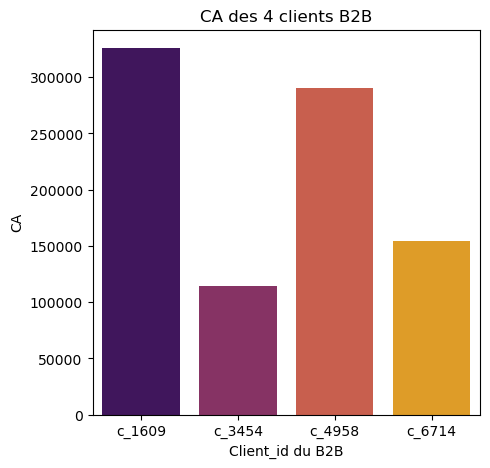

In [448]:
plt.figure(figsize=(5,5))
sns.barplot(data= df_CA_B2B, y='price', x='client_id', palette= "inferno")
plt.xticks(rotation=0)
plt.title('CA des 4 clients B2B')
plt.xlabel("Client_id du B2B")
plt.ylabel("CA")
plt.show()

In [449]:
# Chiffre d'Affaires total par genre

In [450]:
CA_par_sexe = df_Particuliers.groupby('sex')['price'].sum().reset_index().rename(columns={'price': 'CA'})
CA_par_sexe

,sex,CA
0,f,5796925.08
1,m,5346441.93


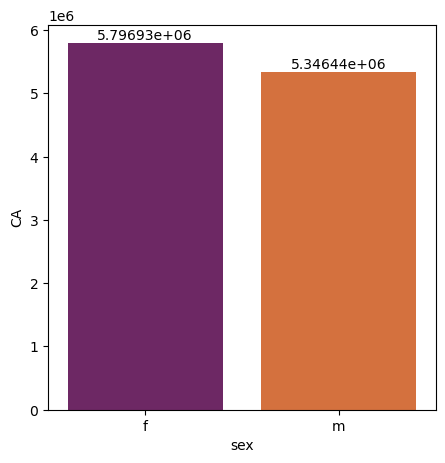

In [451]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x= "sex", y= "CA", data= CA_par_sexe, palette = "inferno")
for container in ax.containers:
    ax.bar_label(container)

In [452]:
# Nombre total des clients

In [453]:
Nombre_total_clients = df_Particuliers['client_id'].nunique()
Nombre_total_clients

8596

In [454]:
# Nombre total par genre

In [455]:
df_nombre_clients_sexe = df_Particuliers.groupby('sex')['client_id'].nunique().reset_index().rename(columns={'sex': 'Nombre'})
df_nombre_clients_sexe

,Nombre,client_id
0,f,4478
1,m,4118


In [456]:
# Approfondir sur le CA des Paticuliers

In [457]:
CA_Particuliers = df_Particuliers.groupby(['client_id'])["price"].sum().reset_index().rename(columns={'price': 'CA'})
CA_Particuliers

,client_id,CA
0,c_1,629.02
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2291.88
4,c_1001,1823.85
...,...,...
8591,c_995,189.41
8592,c_996,1637.34
8593,c_997,1490.01
8594,c_998,2822.22


### Courbe de Lorenz et Gini (Particuliers)

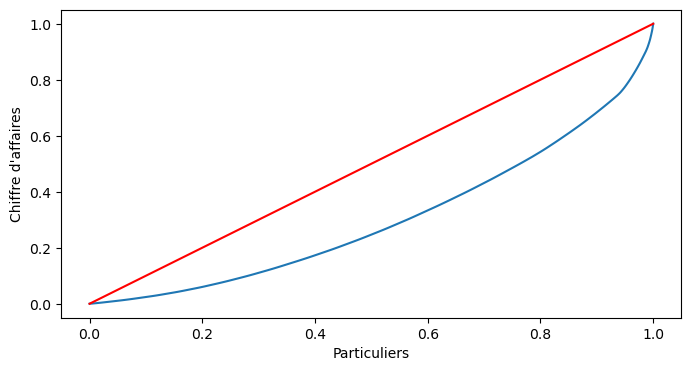

L'indice de Gini est 0.39085002982852024


In [459]:
# Courbe de Lorenz
dep = df_Particuliers["price"].values

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)


plt.figure (figsize= (8,4))
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.ylabel('Chiffre d\'affaires')
plt.xlabel('Particuliers')
plt.plot([0, 1], [0, 1], color = 'red', linestyle = 'solid',label="Courbe d'égalité parfaite")
plt.show()


#Indice de gini

n = len(lorenz)

AUC = (lorenz.sum()-lorenz[-1])/n 

# S est la surface entre la première bissectrice et le courbe de Lorenz

S = 0.5 - AUC 

# Définition de l'indicateur de Gini

gini = (2*S)

print(f"L'indice de Gini est {gini}")

### Courbe de Lorenz et Gini (B2B)

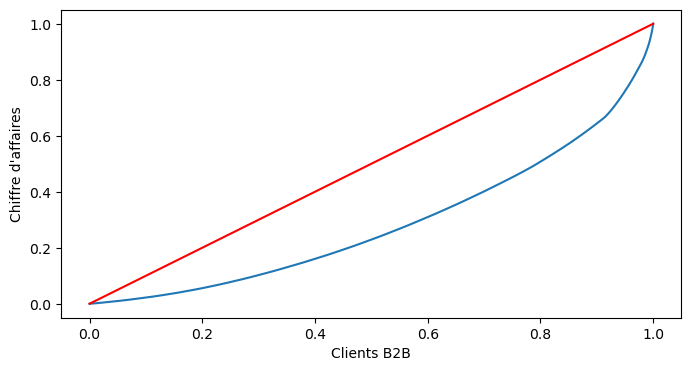

L'indice de Gini est 0.4255540701892969


In [461]:
# Courbe de Lorenz
dep = df_B2B["price"].values

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)


plt.figure (figsize= (8,4))
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.ylabel('Chiffre d\'affaires')
plt.xlabel('Clients B2B')
plt.plot([0, 1], [0, 1], color = 'red', linestyle = 'solid',label="Courbe d'égalité parfaite")
plt.show()



#Indice de gini

n = len(lorenz)

AUC = (lorenz.sum()-lorenz[-1])/n 

# S est la surface entre la première bissectrice et le courbe de Lorenz

S = 0.5 - AUC 

# Définition de l'indicateur de Gini

gini = (2*S)

print(f"L'indice de Gini est {gini}")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie analyse pour Julie</h2>
</div>

## Lien entre le sexe des clients & la catégorie des livres achetés

In [464]:
#CA par genre et categorie

df_sexe_cat = df_Particuliers.pivot_table(index='sex', columns='categ', values='price', aggfunc='count')
df_sexe_cat

categ,0,1,2
sex,,,
f,200793,115721,16980
m,186488,104884,15868


<Axes: xlabel='sex'>

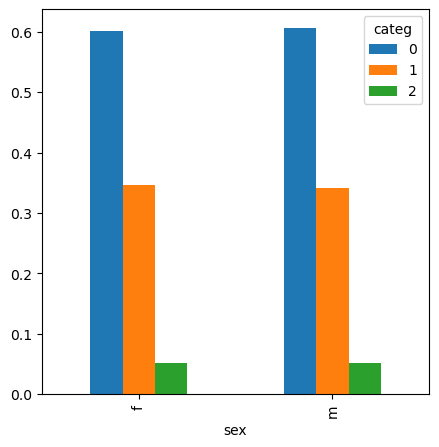

In [465]:
# 2 variables catégoriques

(pd.crosstab(df_Particuliers['sex'],df_Particuliers['categ'], 
             normalize='index').plot.bar(figsize=(5, 5))
)

### Chi-Squared test

In [467]:
# Détermine s'il existe une association ou une dépendance entre des variables catégorielles. 
# Il s'agit d'un test non paramétrique (ne requiert pas une distribution normale pour être analysé)

In [468]:
# Il y a trois assumptions :

# 1) les observations dans chaque echantillon sont indépendantes et distribuées identiquement
# 2) La valeur attendue des cellules doit être de 5 ou plus dans au moins 80 % des cellules
# 3) les deux variables doivent être catégoriques

In [469]:
# Hypoythèse :

# HO : Les variables sont indépendantes si la p_value est > 0.05

# Ha : Il y a une dépendance entre les deux variables si la p_value est < 0.05

In [470]:
d = chi2_contingency(df_sexe_cat)
d

Chi2ContingencyResult(statistic=22.66856665178056, pvalue=1.1955928116587024e-05, dof=2, expected_freq=array([[201574.89662481, 114822.13191434,  17096.97146086],
       [185706.10337519, 105782.86808566,  15751.02853914]]))

In [471]:
#Unpacking
stats, p_value, a,b = d

In [472]:
alpha = 0.05
if p_value > alpha:
    print(f"p_value est {p_value,10} on peut conclure avec 95% certitude que les variables sont indépendantes")
else:
    print(f"p_value est {p_value} on peut conclure avec 95% certitude qu'il y a une forte dépendance entre les deux variables")

p_value est 1.1955928116587024e-05 on peut conclure avec 95% certitude qu'il y a une forte dépendance entre les deux variables


## Lien entre Age des clients le montant total des achats

In [474]:
df_age_CA = df_Particuliers.groupby('age')['price'].sum().reset_index().rename(columns={'price': 'CA'})
df_age_CA

,age,CA
0,20,616418.15
1,21,180680.89
2,22,186791.83
3,23,181233.57
4,24,167388.08
...,...,...
71,91,5477.83
72,92,5059.18
73,93,2815.45
74,94,4251.22


Text(0, 0.5, 'Montant total des achats')

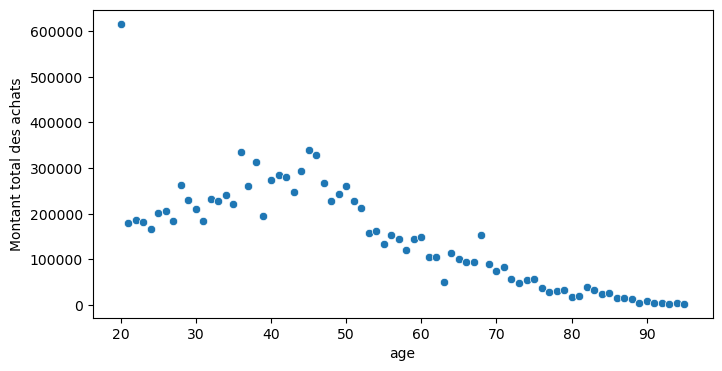

In [475]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x= "age", y= "CA", data= df_age_CA)
plt.ylabel("Montant total des achats")

In [476]:
# Deux variables quantitatives !

In [477]:
# Tester la normalité des deux variables (âge et CA)

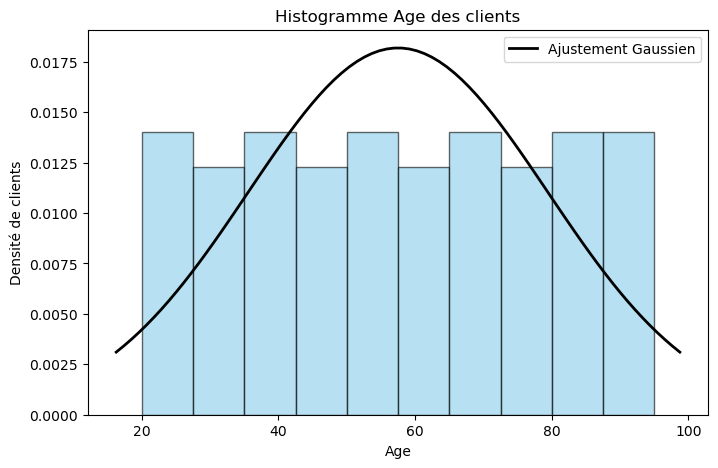

In [478]:
plt.figure(figsize=(8, 5))

# Histogramme

plt.hist(df_age_CA["age"], bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

# Ajustement gaussien
mu, std = norm.fit(df_age_CA["age"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, df_age_CA["age"].count())
p = norm.pdf(x, mu, std)

# Tracer la courbe gaussienne
plt.plot(x, p, 'k', linewidth=2, label='Ajustement Gaussien')

# Ajouter les titres et légendes en français
plt.title('Histogramme Age des clients')
plt.xlabel('Age')
plt.ylabel('Densité de clients')
plt.legend()

# Afficher le graphique
plt.show()

C:\Users\claud\AppData\Local\Temp\ipykernel_18888\280311635.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='age', ylabel='Density'>

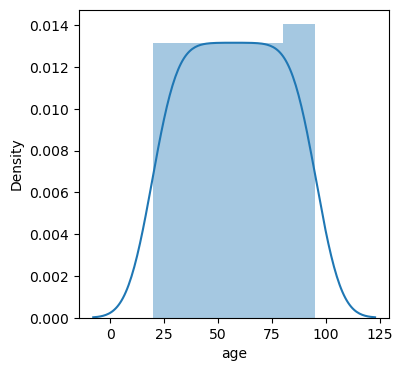

In [479]:
plt.figure(figsize=(4,4))
sns.distplot(df_age_CA["age"])

In [480]:
# Re-confirmer la normalité avec un test Shapiro-Wilk

In [481]:
from scipy.stats import shapiro
stats, p_value = shapiro(df_age_CA["age"])

In [482]:
alpha = 0.05

if p_value > alpha:
    print(f"La p_valeur est {round(p_value,10)} donc on peut conclure avec 95% certitude que la data suit une distribution normale")
else :
    print(f"La p_valeur est {round(p_value,10)} donc on peut conclure avec 95% certitude que la data ne suit pas une distribution normale")

La p_valeur est 0.0087528856 donc on peut conclure avec 95% certitude que la data ne suit pas une distribution normale


C:\Users\claud\AppData\Local\Temp\ipykernel_18888\1883036939.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='CA', ylabel='Density'>

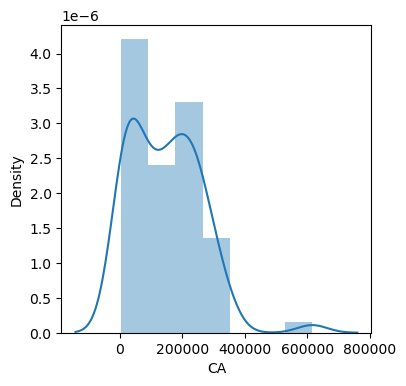

In [483]:
plt.figure(figsize=(4,4))
sns.distplot(df_age_CA["CA"])

In [484]:
stats, p_value = shapiro(df_age_CA["CA"])

In [485]:
alpha = 0.05

if p_value > alpha:
    print(f"La p_valeur est {round(p_value,10)} donc on peut conclure avec 95% certitude que la data suit une distribution normale")
else :
    print(f"La p_valeur est {round(p_value,10)} donc on peut conclure avec 95% certitude que la data ne suit pas une distribution normale")

La p_valeur est 6.47361e-05 donc on peut conclure avec 95% certitude que la data ne suit pas une distribution normale


In [486]:
# La variable âge et CA ne suivent pas une distribution normale, donc on peut pas utiliser Pearson Correlation test. 
# On utilise plutôt un test non paramétrique comme la corrélation de Spearman.

### Spearman corrélation 

In [488]:
# Hypoythèse :

# HO : Il n'y a pas de corrélation entre les deux variables :  rs = 0

# Ha : Il y a une corrélation entre les deux variables : rs != 0

In [489]:
# La corrélation de Spearman entre deux variables est égale à la corrélation de Pearson entre les "valeurs de rang" de ces deux variables
# Elle mesure la force mais aussi la direction de la relation entre deux variables continues

In [490]:
from scipy.stats import pearsonr,spearmanr

In [491]:
# rs et p_value de Spearman

spearmanr_coefficient, p_value = spearmanr(df_age_CA["age"],df_age_CA["CA"])
print("Le coffecient de Spearman est %0.3f"% (spearmanr_coefficient))
print("La p_value est : ", p_value)

Le coffecient de Spearman est -0.874
La p_value est :  5.956077505475151e-25


In [492]:
# La (rs) Spearman Corrélation rejète l'hypothèse nulle et le test révèle une correlation négative très forte.

## Lien entre Age des clients la fréquence d'achats

In [494]:
df_age_freq = df_Particuliers.groupby('age')['session_id'].count().reset_index().rename(columns={'session_id': 'freq'})
df_age_freq 

,age,freq
0,20,15497
1,21,4491
2,22,4711
3,23,4378
4,24,4529
...,...,...
71,91,336
72,92,312
73,93,170
74,94,238


Text(0, 0.5, "Fréquence d'achats")

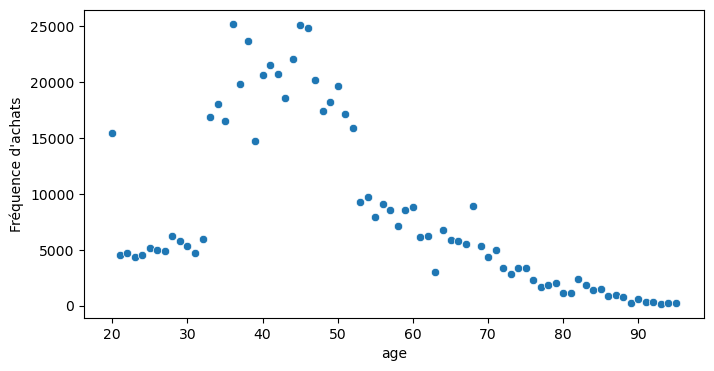

In [495]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x= "age", y= "freq", data= df_age_freq)
plt.ylabel("Fréquence d'achats")

In [496]:
# Pearson Corrélation évalue non seulement la force mais aussi la direction de la relation entre deux variables continues

In [497]:
# Assumptions pour Pearson Corrélation Test :

# 1) les observations dans chaque echantillons sont indépendantes et identiquement distribuées 
# 2) les observations dans chaque echantillons sont distribuées normalement
# 3) les observations dans chaque echantillons ont à peu près la même variance
# 4) lesobservations sont linéairement associés

In [498]:
# Vérifier si les deux variables sont normalement distribuées

C:\Users\claud\AppData\Local\Temp\ipykernel_18888\1316628986.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='age', ylabel='Density'>

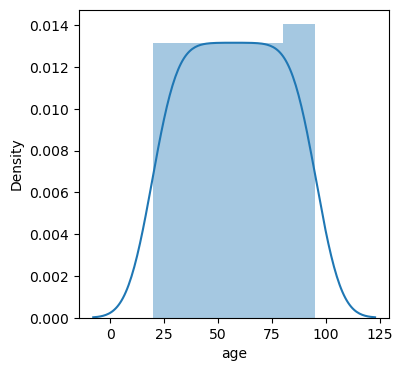

In [499]:
plt.figure(figsize=(4,4))
sns.distplot(df_age_freq["age"])

In [500]:
# Vérification de la distribution normale de "age" avec le Shapiro Test

In [501]:
# Assumptions : Observations dans chaque echantillon sont indépendants et identiquemment distribuées

# HO : La data est distribuée normalement (Gaussian) si p_value >= 0.05

# Ha : La data n'est pas distribuée normalement (Gaussian) si p_value < 0.05

In [502]:
from scipy.stats import shapiro

stats, p_value = shapiro(df_age_freq["age"])

In [503]:
alpha = 0.05

if p_value > alpha:
    print(f"La p_valeur est {round(p_value,10)} donc on peut conclure avec 95% certitude que la data suit une distribution normale")
else :
    print(f"La p_valeur est {round(p_value,10)} donc on peut conclure avec 95% certitude que la data ne suit pas une distribution normale")

La p_valeur est 0.0087528856 donc on peut conclure avec 95% certitude que la data ne suit pas une distribution normale


In [504]:
# Vérification de la distribution normale de "frequence d'achats" 

C:\Users\claud\AppData\Local\Temp\ipykernel_18888\715935578.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='freq', ylabel='Density'>

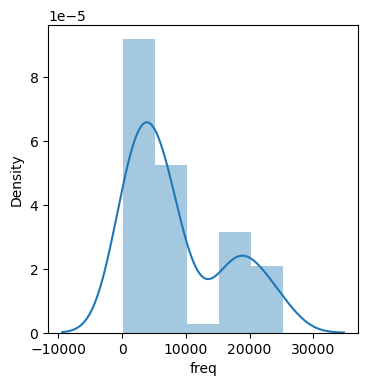

In [505]:
plt.figure(figsize=(4,4))
sns.distplot(df_age_freq["freq"])

In [506]:
stats, p_value = shapiro(df_age_freq["freq"])

In [507]:
alpha = 0.05

if p_value > alpha:
    print(f"La p_valeur est {round(p_value,10)} donc on peut conclure avec 95% certitude que la data suit une distribution normale")
else :
    print(f"La p_valeur est {round(p_value,10)} donc on peut conclure avec 95% certitude que la data ne suit pas une distribution normale")

La p_valeur est 5.638e-07 donc on peut conclure avec 95% certitude que la data ne suit pas une distribution normale


In [508]:
# On peut en déduire que les deux ne suivent pas une distribution normale. Il faut donc utiliser une Correlation Spearman à nouveau

### Spearman Corrélation Test

In [510]:
# Hypoythèse :

# HO : Il n'y a pas de corrélation entre les deux variables :  rs = 0

# Ha : Il y a une correlation entre les deux variables : rs != 0

In [511]:
# rs et p_value de Spearman

spearmanr_coefficient, p_value = spearmanr(df_age_freq["age"],df_age_freq["freq"])
print("Le coffecient de Spearman est %0.3f"% (spearmanr_coefficient))
print("La p_value est : ", p_value)

Le coffecient de Spearman est -0.676
La p_value est :  2.146632000345534e-11


In [512]:
# La Corrélation Spearman rejète l'hypothèse nulle et révèle une corrélation negative forte entre âge des clients et la fréquence de leurs achats. 

## Lien entre Age des clients & et la taille du panier moyen

In [514]:
# Deux variables qualitatives

In [515]:
df_panier_moy = df_Particuliers.groupby(['client_id', 'age'])["price"].mean().reset_index().rename(columns={'price': 'moyenne_panier'})
df_panier_moy

,client_id,age,moyenne_panier
0,c_1,69,14.628372
1,c_10,68,23.337931
2,c_100,32,31.856250
3,c_1000,58,18.189524
4,c_1001,42,17.707282
...,...,...,...
8591,c_995,69,13.529286
8592,c_996,54,17.055625
8593,c_997,30,25.254407
8594,c_998,23,51.313091


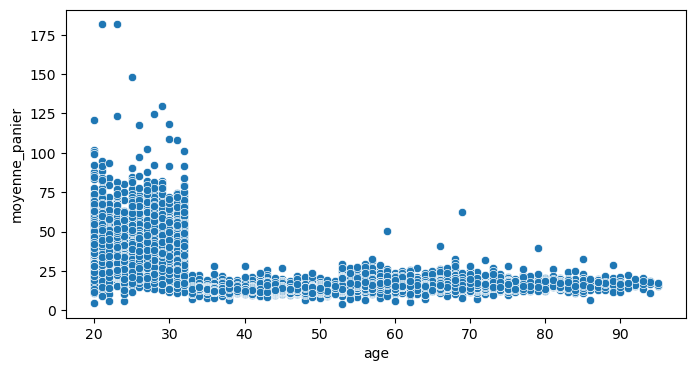

In [516]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x= "age", y= "moyenne_panier", data= df_panier_moy)

In [517]:
# La variable moyenne panier n'est pas normalement distribuée donc on ne peut pas utiliser Anova Test avec Age en catégorie & panier moyen.

# Nous utilisons plutôt Mann Whitney U Test (non paramétrique)

#### Mann Whitney U Test

In [519]:
# Hypoythèse :

# HO : Il n'y a pas de différence significative dans la moyenne de dépenses de tous les groupes (p_value est > 0.05)

# Ha : Il y a une différence significative dans la moyenne de dépenses de tous les groupes (p_value est < 0.05)

In [520]:
from scipy.stats import mannwhitneyu

In [521]:
# Unpacking

statistic, p_val = mannwhitneyu(df_panier_moy["moyenne_panier"], df_panier_moy["age"], use_continuity=True)

print(statistic)
print(p_val)

8387698.0
0.0


In [522]:
# P_value est < 0.05, donc on peut dire qu'il y a une différence significative dans le panier moyen et âge clients

## Lien entre Age des clients & et la catégorie des livres achetés

In [524]:
# Tester pour la distribution normale

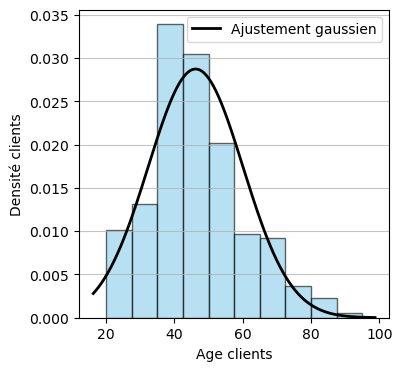

In [525]:
plt.figure(figsize=(4,4))
plt.hist(df_Particuliers["age"], bins=10, density=True, color="skyblue", edgecolor="black", alpha=0.6)

mu, std = norm.fit(df_Particuliers["age"])
xmin, xmax = plt.xlim()
x= np.linspace(xmin, xmax, len(df_Particuliers["age"]))
p = norm.pdf(x, mu, std)
plt.plot(x, p, "k", linewidth=2, label = "Ajustement gaussien")
plt.legend()
plt.xlabel("Age clients")
plt.ylabel("Densité clients")
plt.grid(axis="y", alpha=0.75)

In [526]:
# Shapiro_Wilk Test

In [527]:
stats, p_value = shapiro(df_Particuliers["age"])

C:\Users\claud\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 640734.



In [528]:
alpha = 0.05

if p_value > alpha:
    print(f"La p_valeur est {round(p_value,10)} donc on peut conclure avec 95% certitude que la data suit une distribution normale")
else :
    print(f"La p_valeur est {round(p_value,10)} donc on peut conclure avec 95% certitude que la data ne suit pas une distribution normale")

La p_valeur est 0.0 donc on peut conclure avec 95% certitude que la data ne suit pas une distribution normale


In [529]:
# Puisque la distribution n'est pas normale, on utilise un test non parametrique comme Kruskal–Wallis Test

In [530]:
# Utilisant une boucle for pour aller chercher les valeurs "categ" et ses valeurs correspondantes en "age"

categ = df_Particuliers["categ"].unique()
categ_age = {categ:  df_Particuliers.loc[ df_Particuliers["categ"] == categ, "age"] for categ in categ}
categ_age

{0: 0         38
 1         64
 2         64
 3         53
 4         53
           ..
 640721    33
 640730    35
 640731    35
 640732    35
 640733    37
 Name: age, Length: 387281, dtype: Int64,
 1: 1978      21
 1979      21
 1980      21
 1981      21
 1982      53
           ..
 640725    43
 640726    35
 640727    35
 640728    36
 640729    36
 Name: age, Length: 220605, dtype: Int64,
 2: 3278      30
 3279      30
 3280      30
 3281      31
 3282      31
           ..
 639727    22
 639728    32
 639729    32
 639730    32
 640653    32
 Name: age, Length: 32848, dtype: Int64}

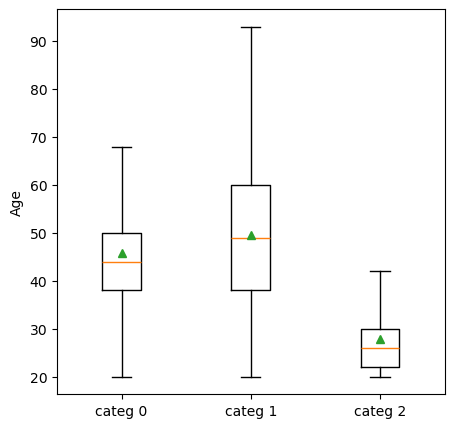

In [531]:
plt.figure(figsize=(5,5))
plt.boxplot([categ_age[0], categ_age[1], categ_age[2]], labels= ["categ 0", "categ 1", "categ 2"],showmeans=True, showfliers=False)
plt.ylabel("Age")
plt.show()

### Kruskal–Wallis Test

In [533]:
# C'est un test statistique non paramétrique utilisé pour comparer trois groupes indépendants ou plus afin de 
# déterminer s'il existe des différences statistiquement significatives entre eux.
# C'est une alternative à Anova Test
# Il est utilisé pour comparer deux ou plusieurs échantillons indépendants de tailles égales ou différentes

In [534]:
# Hypoythèse :

# HO : Il n'y a pas de différence statistiquement significative dans les groups (p_value est > 0.05)

# Ha : Il y a une différence statistiquement significative dans les groups (p_value es < 0.05)

In [535]:
from scipy.stats import kruskal

kruskal(categ_age[0], categ_age[1], categ_age[2])

KruskalResult(statistic=71359.73412120914, pvalue=0.0)

In [536]:
stats, p = kruskal(categ_age[0], categ_age[1], categ_age[2])

if p_value > 0.05:
    print("On peut conclure quIl n'y a pas de différence statistiquement significative dans les groups")
else:
    print("On peut conclure qu'il y a une différence statistiquement significative dans les groups")

On peut conclure qu'il y a une différence statistiquement significative dans les groups
